In [1]:
import matplotlib.pyplot as plt

In [2]:
class PID:
	def __init__(self, Kp, Ki, Kd, target):
		self.Kp = Kp
		self.Ki = Ki
		self.Kd = Kd
		self.target = target
		self.lasterror = 0
		self.integral = 0

	def Calculate(self, torque):
		error = self.target - torque
		self.integral += error
		derivative = error - self.lasterror

		change = self.Kp * error + self.Kd * derivative + self.Ki * self.integral

		return change, error

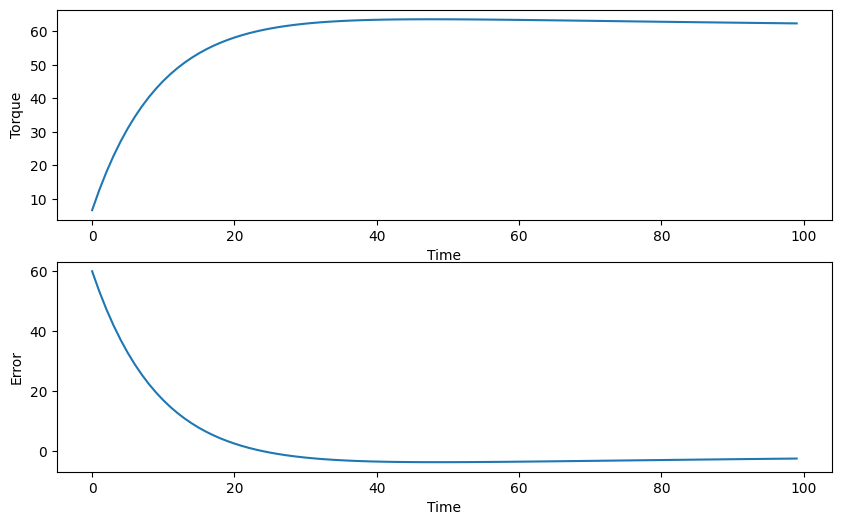

In [3]:
Kp = 0.1
Ki = 0.001
Kd = 0.01

target = 60 #Nm

pid = PID(Kp, Ki, Kd, target)

torque = 0
torques = []
errors = []
time = range(100)

for t in time:
	change, error = pid.Calculate(torque)
	torque += change

	torques.append(torque)
	errors.append(error)

plt.figure(figsize = (10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, torques)
plt.xlabel('Time')
plt.ylabel('Torque')
#plt.title('Torque')

plt.subplot(2, 1, 2)
plt.plot(time, errors)
plt.xlabel('Time')
plt.ylabel('Error')
#plt.title('Error')

plt.show()